### <font color='red'>Importing Required libraries.</font>

In [1]:
#Numpy library for Numerical Calculation
import numpy as np

#Pandas library for dataframe
import pandas as pd

#Matplotlib for plottings
import matplotlib.pyplot as plt

#pickle library for saving the model.
import pickle

#re for regular expression
import re

#nltk for natural language processing
import nltk
nltk.download('stopwords')  #downloading stopwords

#Stopwords for removing stopwords in the text
from nltk.corpus  import stopwords

#porterstemmer for stemming of the words
from nltk.stem.porter import PorterStemmer

#count vectorizer for the bagging of words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

#train_test_split for splitting of the dataset
from sklearn.model_selection import train_test_split

#decision tree classifier, random tree classifier, and multinomial naive bayes >>>> models for the project
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#Accuracy score and confusion matrix for analysis of model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swaraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading of dataset
spam = pd.read_csv(r"C:\Users\Swaraj\Desktop\AIML\spam (1).csv",encoding='ISO-8859-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#checking of null value
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
#dropping of the column names
spam = spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
#naming of the columns
spam.columns = ['labels', 'data']
spam

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#checking the shape
spam.shape

(5572, 2)

In [7]:
#labeling of the data where spams are denoted as 1
spam['b_labels'] = spam['labels'].map({'ham': 0, 'spam': 1})
Y = spam['b_labels'].values
spam

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
#checking for the classes in the group.
spam.groupby('labels').size()

labels
ham     4825
spam     747
dtype: int64

<Axes: xlabel='labels'>

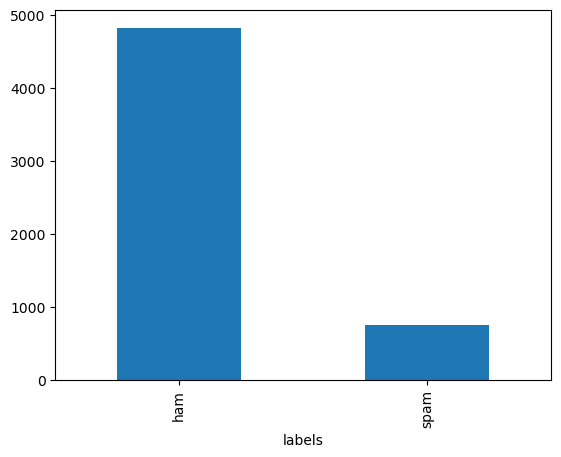

In [11]:
spam['labels'].value_counts().plot(kind='bar')

In [13]:
#preprocessing the data in the dataset
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['data'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [14]:
#creating bag of words
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['labels'])
Y = Y.iloc[:, 1].values

In [21]:
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [19]:
#creating model
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

In [22]:
#preiction 

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [23]:
#testing the model
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[965   0]
 [ 26 124]]
Accuracy:  0.9766816143497757
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[958   7]
 [ 23 127]]
Accuracy:  0.9730941704035875
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582


<Axes: >

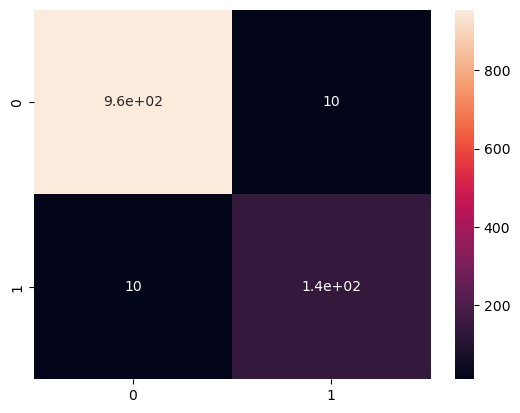

In [24]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [28]:
from sklearn.metrics import classification_report
report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99       965
        True       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       965
        True       0.95      0.85      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.9